In [4]:
import pandas as pd
import numpy as np

In [5]:
df = pd.read_csv('StudentsPerformance.csv')

In [6]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [7]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [8]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [9]:
import seaborn as sb

In [16]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


<Axes: ylabel='math score'>

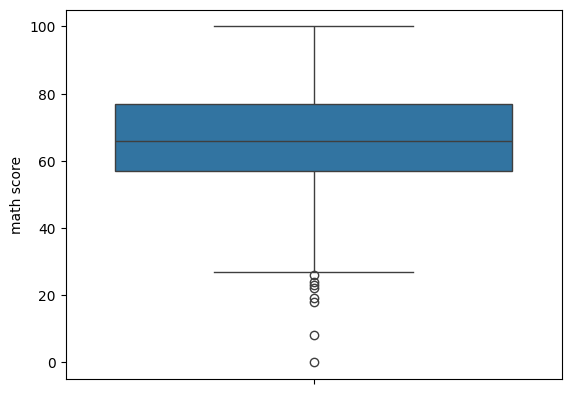

In [10]:
sb.boxplot(df['math score'])

<Axes: ylabel='reading score'>

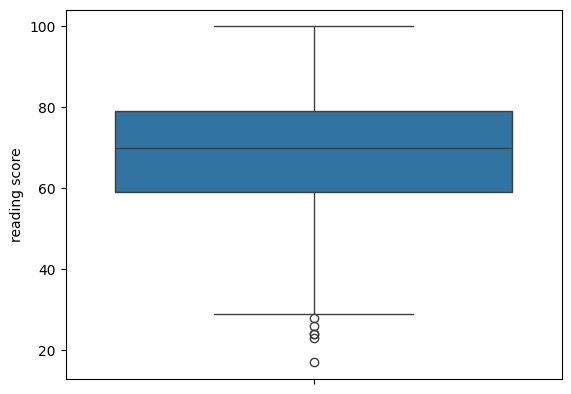

In [11]:
sb.boxplot(df['reading score'])

<Axes: ylabel='writing score'>

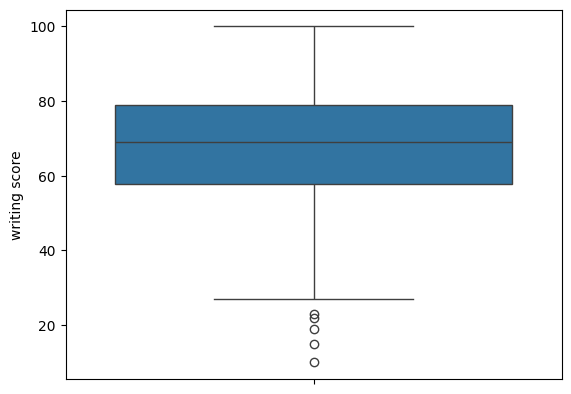

In [12]:
sb.boxplot(df['writing score'])

<Axes: >

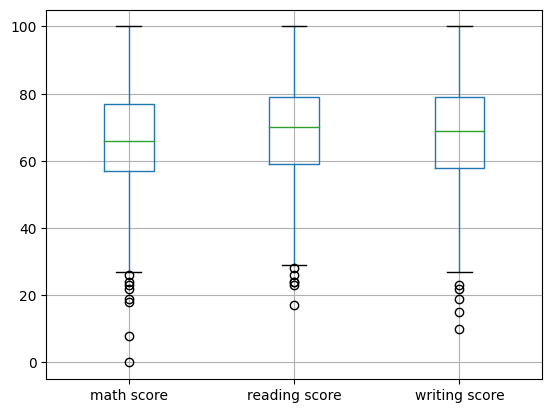

In [13]:
df.boxplot()

# --------------- z Score ------------------

In [18]:
df['math score'].mean()

66.089

In [21]:
#upper limit
ul = df['math score'].mean() + 2 * df['math score'].std()
ul

96.4151601920189

In [22]:
#lower limit
ll = df['math score'].mean() - 2 * df['math score'].std()
ll

35.762839807981095

     gender race/ethnicity parental level of education         lunch  \
0    female        group B           bachelor's degree      standard   
1    female        group C                some college      standard   
2    female        group B             master's degree      standard   
3      male        group A          associate's degree  free/reduced   
4      male        group C                some college      standard   
..      ...            ...                         ...           ...   
995  female        group E             master's degree      standard   
996    male        group C                 high school  free/reduced   
997  female        group C                 high school  free/reduced   
998  female        group D                some college      standard   
999  female        group D                some college  free/reduced   

    test preparation course  math score  reading score  writing score  
0                      none          72             72         

<Axes: ylabel='math score'>

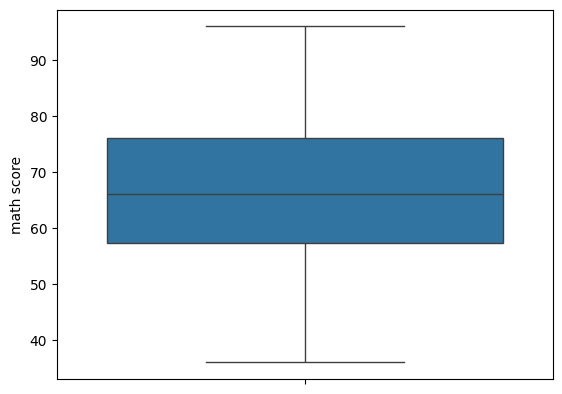

In [24]:
#trimming    - remove outliers
df.loc[(df['math score'] > ul)  |  (df['math score'] < ll )]
dfNew = df.loc[ (df['math score'] < ul)  &  (df['math score'] > ll ) ]
print(dfNew)
print(dfNew.shape)
sb.boxplot(dfNew['math score'])

(1000, 8)


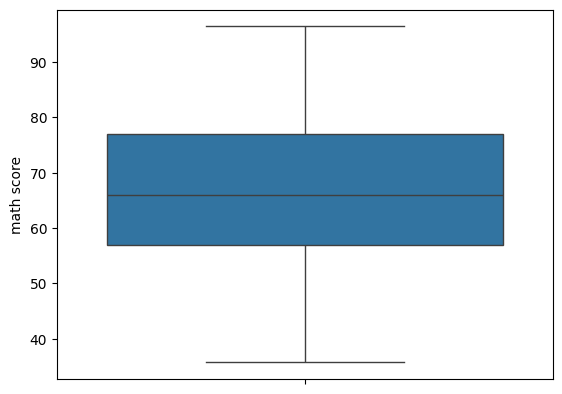

In [25]:
#capping      - replace outliers
dfNew2 = df
dfNew2.loc[ (dfNew2['math score'] > ul) , 'math score' ] = ul
dfNew2.loc[ (dfNew2['math score'] < ll) , 'math score' ] = ll
sb.boxplot(dfNew2['math score'])
dfNew2['math score'].describe()
print(dfNew2.shape)

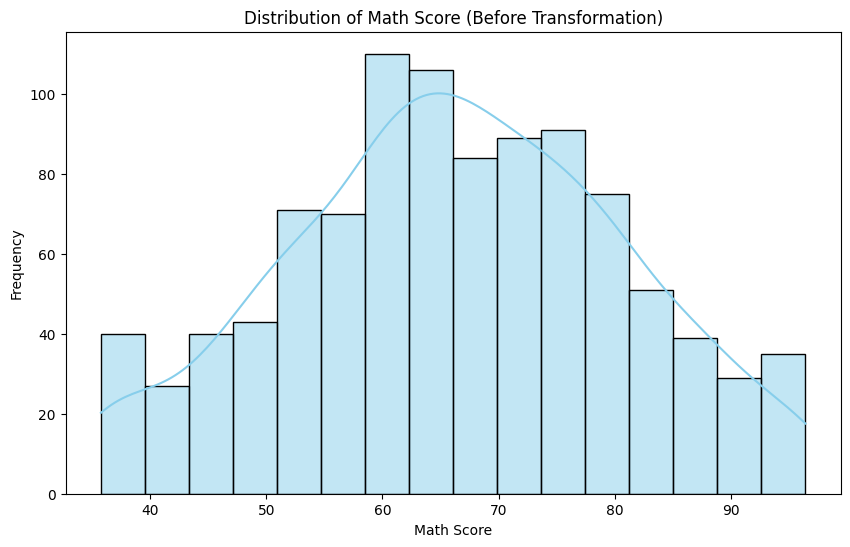

In [27]:
import matplotlib.pyplot as plt


# Plot the distribution of 'math score' before transformation
plt.figure(figsize=(10, 6))
sb.histplot(df['math score'], kde=True, color='skyblue')
plt.title('Distribution of Math Score (Before Transformation)')
plt.xlabel('Math Score')
plt.ylabel('Frequency')
plt.show()

In [28]:
# Apply logarithmic transformation to 'math score'
df['math score_transformed'] = np.log(df['math score'])

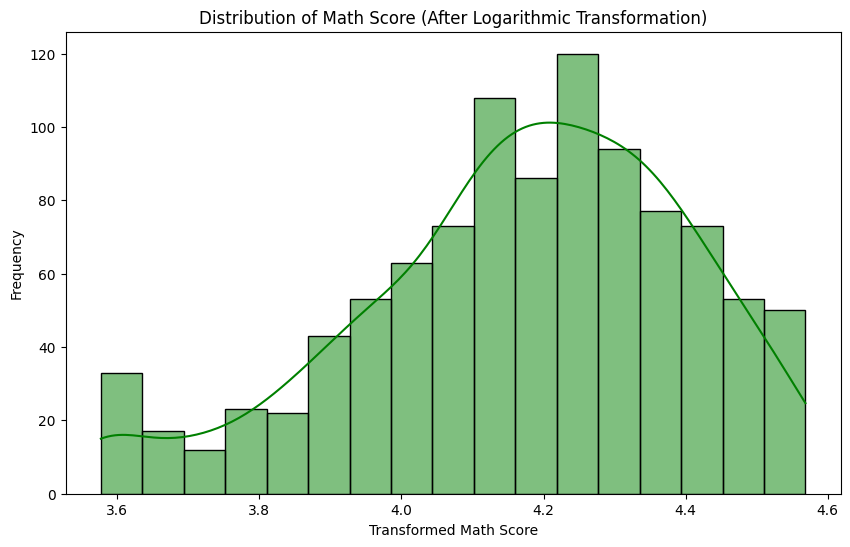

In [29]:

# Plot the distribution of 'math score' after transformation
plt.figure(figsize=(10, 6))
sb.histplot(df['math score_transformed'], kde=True, color='green')
plt.title('Distribution of Math Score (After Logarithmic Transformation)')
plt.xlabel('Transformed Math Score')
plt.ylabel('Frequency')
plt.show()

The code you provided performs outlier detection and treatment using the z-score method, and then applies a logarithmic transformation to the 'math score' variable. Let's break down each part of the code and explain what it does:

1. **Importing Libraries:**
   ```python
   import pandas as pd
   import numpy as np
   import seaborn as sb
   import matplotlib.pyplot as plt
   ```

   Here, necessary libraries like Pandas, NumPy, Seaborn, and Matplotlib are imported.

2. **Loading the Dataset:**
   ```python
   df = pd.read_csv('./StudentsPerformance.csv')
   ```

   This line reads the CSV file containing the dataset and stores it in a DataFrame named `df`.

3. **Displaying the Dataset:**
   ```python
   df
   ```

   This line displays the contents of the DataFrame `df`.

4. **Descriptive Statistics:**
   ```python
   df.describe()
   ```

   It provides descriptive statistics of the dataset, including count, mean, standard deviation, minimum, quartiles, and maximum values for numeric columns.

5. **Checking for Missing Values:**
   ```python
   df.isnull().sum()
   ```

   This line checks for missing values in the DataFrame `df` and displays the sum of missing values for each column.

6. **Boxplot Visualization:**
   ```python
   sb.boxplot(df['math score'])
   ```

   It creates a boxplot to visualize the distribution of the 'math score' variable and identify any potential outliers.

7. **Z-Score Outlier Detection and Treatment:**
   - **Calculating Upper and Lower Limits:**
     ```python
     ul = df['math score'].mean() + 2 * df['math score'].std()
     ll = df['math score'].mean() - 2 * df['math score'].std()
     ```

     Upper and lower limits are calculated based on the mean and standard deviation of the 'math score' variable.

   - **Trimming Outliers:**
     ```python
     dfNew = df.loc[(df['math score'] < ul) & (df['math score'] > ll)]
     ```

     Outliers are removed by selecting rows where the 'math score' falls within the calculated upper and lower limits.

   - **Capping Outliers:**
     ```python
     dfNew2 = df
     dfNew2.loc[(dfNew2['math score'] > ul), 'math score'] = ul
     dfNew2.loc[(dfNew2['math score'] < ll), 'math score'] = ll
     ```

     Outliers are replaced with the upper and lower limits if they exceed or fall below these limits.

8. **Histogram Visualization Before and After Transformation:**
   ```python
   plt.figure(figsize=(10, 6))
   sb.histplot(df['math score'], kde=True, color='skyblue')
   plt.title('Distribution of Math Score (Before Transformation)')
   plt.xlabel('Math Score')
   plt.ylabel('Frequency')
   plt.show()
   ```

   It creates a histogram to visualize the distribution of the 'math score' variable before applying the transformation.

   ```python
   df['math score_transformed'] = np.log(df['math score'])
   ```

   Logarithmic transformation is applied to the 'math score' variable using NumPy's `log` function and stored in a new column named 'math score_transformed'.

   ```python
   plt.figure(figsize=(10, 6))
   sb.histplot(df['math score_transformed'], kde=True, color='green')
   plt.title('Distribution of Math Score (After Logarithmic Transformation)')
   plt.xlabel('Transformed Math Score')
   plt.ylabel('Frequency')
   plt.show()
   ```

   It creates another histogram to visualize the distribution of the transformed 'math score' variable after applying the logarithmic transformation.

This code demonstrates outlier detection and treatment using z-scores and applies a logarithmic transformation to address skewness in the 'math score' variable, along with visualization of the distributions before and after the transformation.

# ---------------------------------------------

Replacing missing numerical and categorical values in a dataset is a crucial step in data preprocessing. There are several methods to handle missing values, including:

1. **Numerical Missing Values:**
   - **Mean/Median Imputation:** Replace missing numerical values with the mean or median of the respective column.
   - **Regression Imputation:** Predict missing values using regression models based on other available features.
   - **K-Nearest Neighbors (KNN) Imputation:** Fill in missing values based on the values of nearest neighbors in feature space.
   - **Random Imputation:** Replace missing values with random values from the same column distribution.
   - **Using Business Logic:** Replace missing values based on domain knowledge or business rules.

2. **Categorical Missing Values:**
   - **Mode Imputation:** Replace missing categorical values with the mode (most frequent category) of the respective column.
   - **Using Business Logic:** Replace missing values based on domain knowledge or business rules.
   - **Create a New Category:** Treat missing values as a separate category if it makes sense in the context of the data.

Here's how you can perform replacement using Python and Pandas:

```python
import pandas as pd

# Load the dataset
df = pd.read_csv('your_dataset.csv')

# Replace missing numerical values with mean
df['numerical_column'].fillna(df['numerical_column'].mean(), inplace=True)

# Replace missing categorical values with mode
df['categorical_column'].fillna(df['categorical_column'].mode()[0], inplace=True)

# For categorical columns, if replacing with a new category makes sense
# df['categorical_column'].fillna('Unknown', inplace=True)

# For numerical columns, if replacing with a specific value makes sense
# df['numerical_column'].fillna(0, inplace=True)

# Check if there are any missing values left
print(df.isnull().sum())
```

Replace `'your_dataset.csv'` with the path to your dataset file, and `'numerical_column'` and `'categorical_column'` with the names of the columns containing numerical and categorical values, respectively.

Make sure to choose the replacement strategy based on the nature of your data and the problem context. It's also essential to evaluate the impact of missing value imputation on your analysis or model performance.